In [1]:
# diego
from geoanalysistools.geo import *
data = readconf("config.toml")

Loading GeoAnalysisTools
{'profile_name': 'Profile', 'global_geojson_file': 'data/ter1638644509267_latMin26.6_longMin-19..geojson', 'global_geojson_slice_file': 'data/lapalma-datetime-slice.geojson'}


In [2]:
df = gpd.read_file( data['default']['global_geojson_slice_file'], driver="GeoJSON" )
df[["Date"]] = df[["Date"]].apply(pd.to_datetime)

In [3]:
# Drop some Rows based on Bounding box condition
df = df.drop(df[df.latitud < data['profile1']['minlat']].index)
df = df.drop(df[df.latitud > data['profile1']['maxlat']].index)
df = df.drop(df[df.longitud < data['profile1']['minlon']].index)
df = df.drop(df[df.longitud > data['profile1']['maxlon']].index)

In [4]:
gdf = GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitud, df.latitud))

In [5]:
q_low = gdf.loc[ gdf['magnitud'].between(2.4,2.85) ]
q_norm = gdf.loc[ gdf['magnitud'].between(2.7,3.65) ]
q_mid = gdf.loc[ gdf['magnitud'].between(3.5,4.3) ]
q_hi = gdf.loc[ gdf['magnitud'].between(4.3,4.8) ]
q_max = gdf.loc[ gdf['magnitud'].between(4.3,6) ]
profs = [
    (q_low['profundidad'].min(), q_low['profundidad'].std()),      # 2.4 - 2.85
    (q_norm['profundidad'].mean(), q_norm['profundidad'].std()),   # 2.7 - 3.65
    (q_mid['profundidad'].mean(), q_mid['profundidad'].std()),     # 3.5 - 4.3
    (q_hi['profundidad'].mean(), q_hi['profundidad'].std()),       # 4.3 - 4.8
    (q_max['profundidad'].max(), q_max['profundidad'].std()),      # 4.3 - 6
     ]
profs

[(0.0, 8.016282691420287),
 (15.587240269242027, 8.82244688234091),
 (19.947017543859648, 11.597821851858114),
 (36.25238095238095, 1.7602990454421195),
 (40.6, 1.7259413284894)]

<AxesSubplot:>

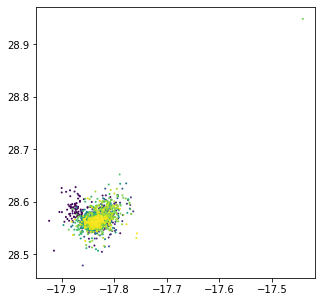

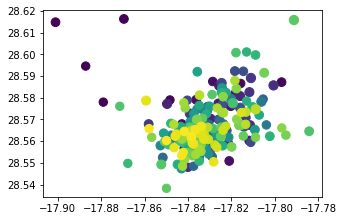

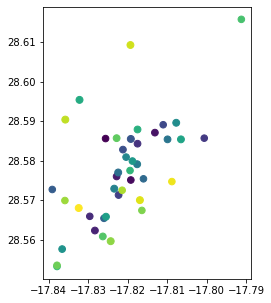

In [9]:
#q_low.geometry.plot(figsize=(5,5), markersize=1, c=q_low.profundidad, cmap='viridis')
q_norm.geometry.plot(figsize=(5,5), markersize=1, c=q_norm.profundidad, cmap='viridis')
q_mid.geometry.plot(figsize=(5,5), markersize=q_mid.magnitud*20, c=q_mid.profundidad, cmap='viridis')
q_hi.geometry.plot(figsize=(5,5), markersize=q_hi.magnitud*10, c=q_hi.profundidad, cmap='viridis')

In [10]:
# q_max.convex_hull
# q_mid.geometry.corr
q_mid.geometry.total_bounds
# q_mid.geometry.interpolate(distance=0.1).plot()
# q_mid.geometry.exterior.plot()

gdf.geometry.explore(scheme='BoxPlot', cmap='blues', vmin=1.8, vmax=5, tooltip=True, popup=True)

In [8]:
dir(q_max.geometry)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd_